##  Results 2 Notebook: A deep dive into augmentation.



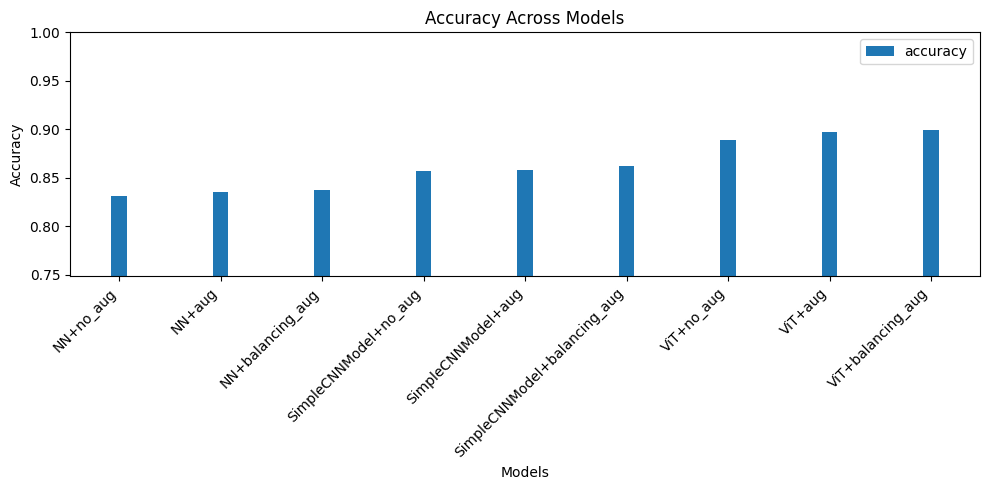

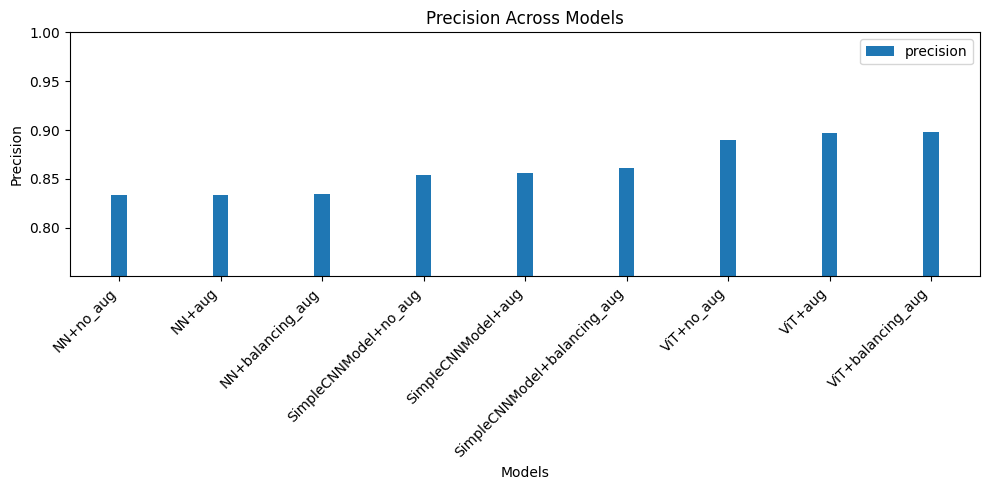

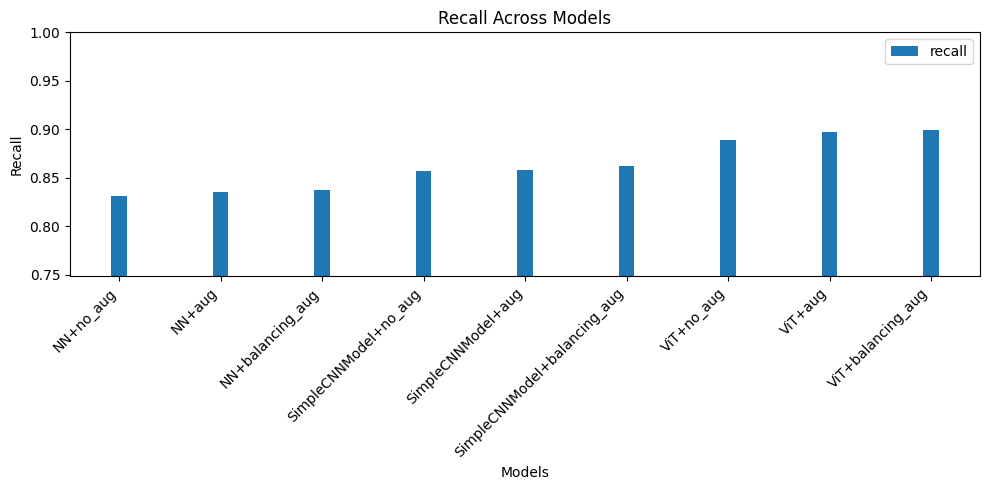

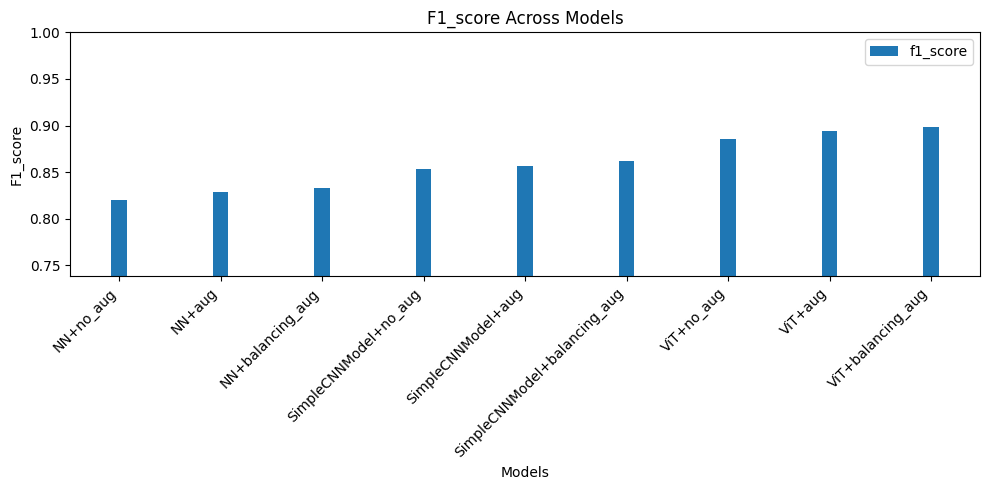

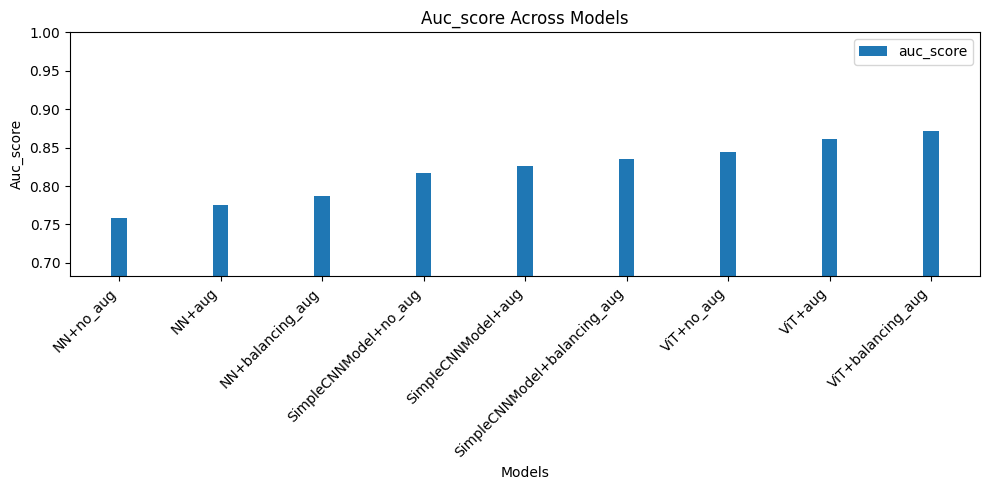

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open("C:/trained_models/results_new.json", 'r') as file:
    data = json.load(file)

models = []
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_score']
confusion_matrices = []

for item in data:
    path_model = item["path_model"]
    metrics = item["metrics"]
    
    model_name = path_model.replace("_with", "").split("\\")[-1].split(".")[0]
    prefix, suffix = model_name.split("_", 1)
    new_prefix = prefix.replace("SimpleNNModel", "NN").replace("SimpleCNNModel", "SimpleCNNModel").replace("VisionTransformerModel", "ViT")
    renamed_model = f"{new_prefix}+{suffix}"
    
    models.append({
        "name": renamed_model,
        **{metric: metrics[metric] for metric in metrics_to_plot}
    })
    confusion_matrices.append(metrics['confusion_matrix'])

# Plot metrics
x_labels = [model['name'] for model in models]
x = np.arange(len(models))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    plt.figure(figsize=(10, 5))
    values = [model[metric] for model in models]
    sorted_pairs = sorted(zip(values, x_labels))
    sorted_values, sorted_x_labels = zip(*sorted_pairs)
    
    plt.bar(sorted_x_labels, sorted_values, width, label=metric)
    plt.ylim(min(values)*0.9, 1)
    plt.xticks(sorted_x_labels, x_labels, rotation=45, ha='right')
    plt.title(f'{metric.capitalize()} Across Models')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Models')
    plt.legend()
    plt.tight_layout()
    plt.show()



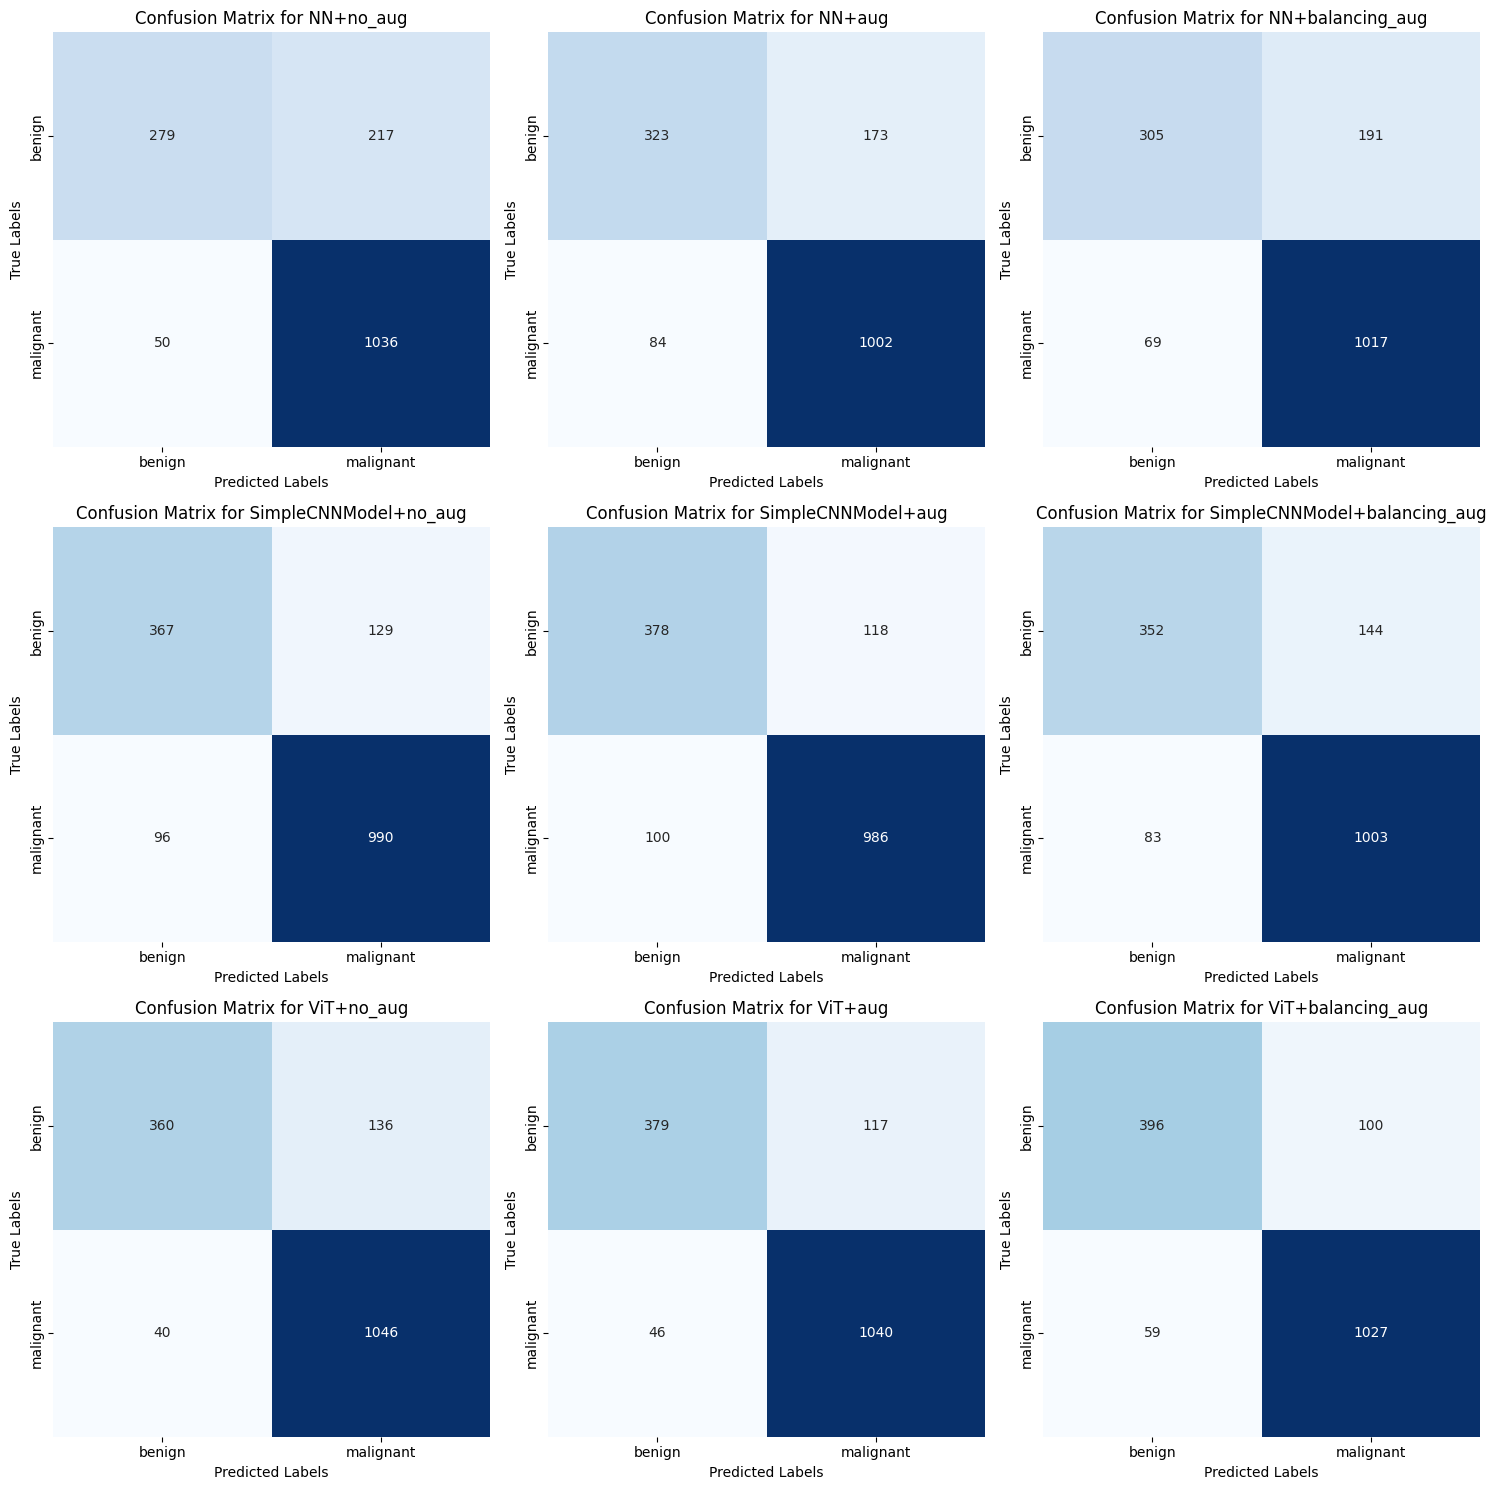

In [20]:
import seaborn as sns

def plot_confusion_matrix(cm, model_name, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_xticklabels(['benign', 'malignant'])
    ax.set_yticklabels(['benign', 'malignant'])

num_matrices = len(confusion_matrices)
num_cols = (num_matrices + 2) // 3  # Ensure at least 2 rows

fig, axes = plt.subplots(3, num_cols, figsize=(15, 15))

for i, cm in enumerate(confusion_matrices):
    row = i // num_cols
    col = i % num_cols
    plot_confusion_matrix(cm, x_labels[i], axes[row, col])

# Hide any unused subplots
for j in range(num_matrices, 3 * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()